In [138]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

from dateutil import parser
from matplotlib import pyplot as plt

names = "M11,M12,M13,M14,M15,M16,M21,M22,M23,M24,M25,M26,M31,M32,M33,M34,M35,M36,M41,M42,M43,M44,M45,M46,M51,M52,M53,M54,M55,M56,M61,M62,M63,M64,M65,M66".split(",")
names_of_motives = dict(zip(map(str,range(1,len(names)+1)),names))

% matplotlib inline 

In [4]:
os.listdir(".")

['plot_motifs_timeseries_norm.csv',
 'CheckTimeSeriesOfMotifs.ipynb',
 'final-data',
 '.ipynb_checkpoints',
 'plot_motifs_timeseries.csv']

In [6]:
#! head 'plot_motifs_timeseries.csv'

In [56]:
MOTIVS_TIME_SERIES = pd.read_csv("plot_motifs_timeseries_norm.csv",header=0,sep=",",index_col=0,parse_dates=True)

In [115]:
#UNNOMALIZED 
#DATETIME_INDEX = []
#for day_string in MOTIVS_TIME_SERIES.index:
#    DATETIME_INDEX.append(parser.parse(day_string[1:-2].split(",")[1][1:]+" 2017"))

In [71]:
DATETIME_INDEX = []
for day_string in MOTIVS_TIME_SERIES.index:
    DATETIME_INDEX.append(parser.parse(day_string[1:-1]+ "2017 "))

In [73]:
MOTIVS_TIME_SERIES.index = DATETIME_INDEX

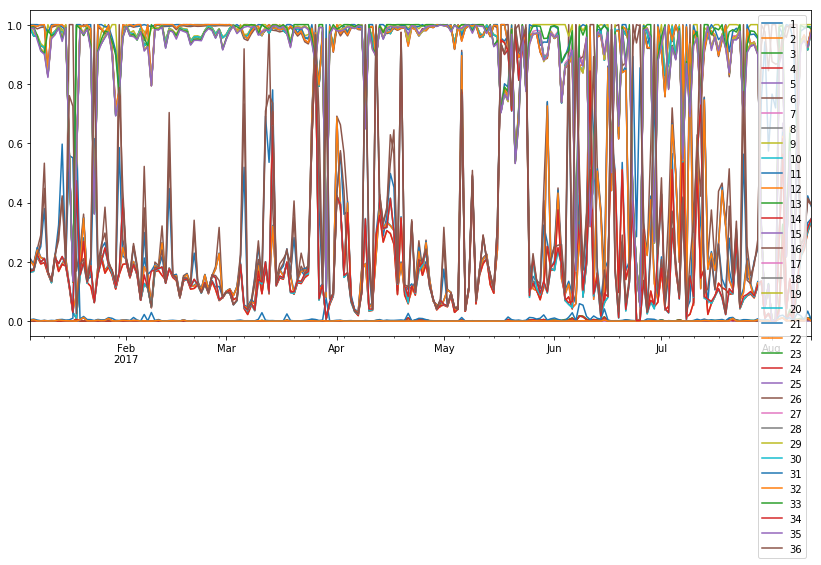

In [74]:
fig, ax = plt.subplots(figsize=(14,6))
MOTIVS_TIME_SERIES.plot(ax=ax)

In [76]:
DESCRIPTION = MOTIVS_TIME_SERIES.describe()

In [86]:
NORMALIZED_STD = []
for c,std in zip(DESCRIPTION.columns,DESCRIPTION.ix["std"].values):
    NORMALIZED_STD.append((std,c))
NORMALIZED_STD.sort(reverse=True)

In [101]:
BEST_COLUMNS = [a[1] for a in NORMALIZED_STD[:6]]
BEST_COLUMNS

['6', '36', '1', '11', '5', '12']

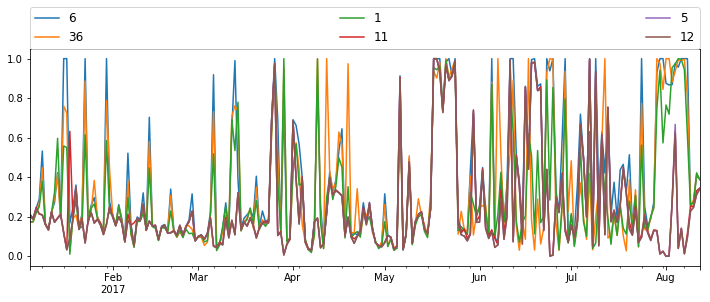

In [130]:
fig = plt.figure(figsize=(12, 6))
for column in BEST_COLUMNS:
    gs[0]MOTIVS_TIME_SERIES[BEST_COLUMNS].plot(ax=ax)

#lgd= plt.legend(prop={'size':12},bbox_to_anchor=(0., 1., 1., .102), loc=3,
#           ncol=3, mode="expand", borderaxespad=0.)
#plt.savefig("a.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

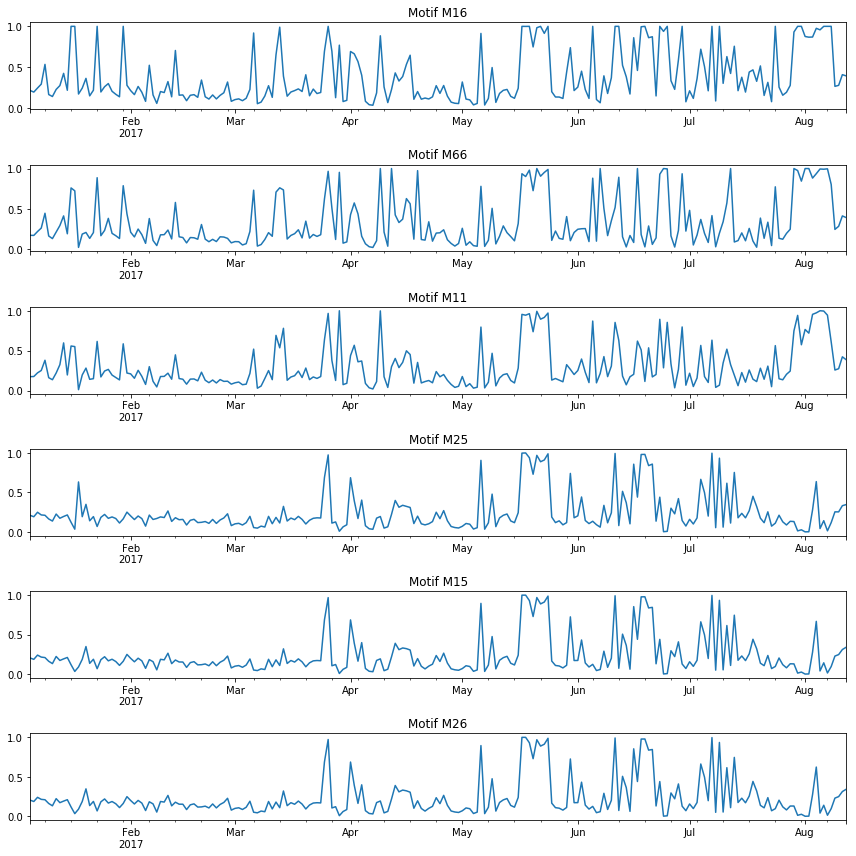

In [140]:

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12,12))
for i,column in enumerate(BEST_COLUMNS):
    MOTIVS_TIME_SERIES[column].plot(ax=axes[i])
    ax=axes[i].set_title("Motif "+names_of_motives[column])
plt.tight_layout()
#set ticks every week
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

(array([ 46.,  70.,  36.,  14.,   7.,  13.,   7.,   7.,   5.,  15.]),
 array([ 0.01111035,  0.10999932,  0.20888828,  0.30777724,  0.40666621,
         0.50555518,  0.60444414,  0.70333311,  0.80222207,  0.90111104,  1.        ]),
 <a list of 10 Patch objects>)

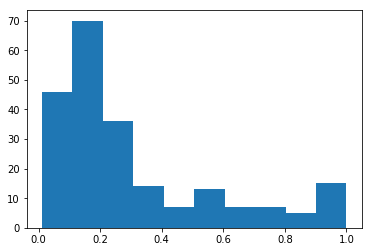

In [107]:
plt.hist(MOTIVS_TIME_SERIES["1"].values)